## Natural language processing servers many use cases: Structured nad unstructured text data. Shifting through thousands f pages to find a relevant article or legal document. 

#### First compile documents
#### Featurize them 
#### Compare the ffeatures -> We vectorize the words by count in a collection called a bag of words. We take the similarites in the vecotors and can run mathmatical features on them. To find how similat 2 documets are. Improve by adjusting the wors counts in all the corputs(groupps od all docs)
## TF iDF -> Ter mfrequency  inverse document frequency
### TF -> the number occurrances of term in document 
### inverse df -> importance of term in all documents

#### Buiding a spam detection Filter

In [1]:
import nltk

In [ ]:
##nltk.download_shell()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
messages = [line.rstrip() for line in open('resources/SMSSpamCollection')]

In [10]:
for mess_num, mess in enumerate(messages[:10]):
    print(mess_num, mess)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [13]:
messs = pd.read_csv('resources/SMSSpamCollection', sep= "\t", names=["label", "Message"])

In [16]:
messs

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
messs.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
messs.groupby("label").describe()

Message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Featuring Engineering on spamn detection

In [21]:
messs["length"] = messs["Message"].apply(len)

In [22]:
messs

,label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [23]:
import seaborn as sns

### Looks like there is a  really long text message close to 800 and another at 1000. Lets find that text

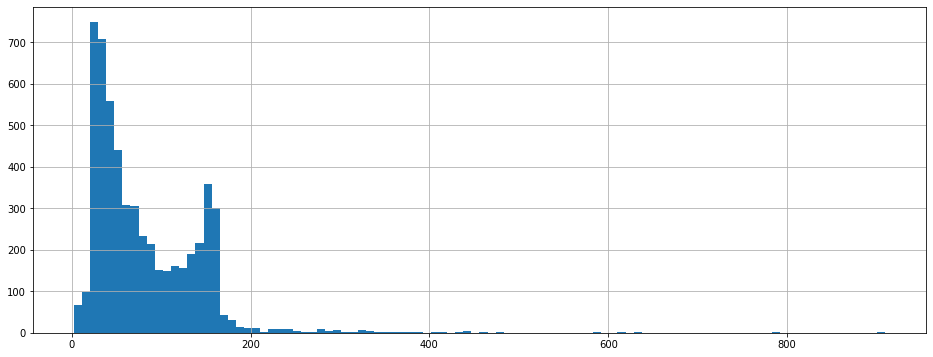

In [27]:
messs["length"].hist(bins = 100, figsize = (16,6))

In [28]:
messs["length"].idxmax()

1085

In [29]:
messs.loc[1085]

label                                                    ham
Message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object

In [33]:
messs[messs["length"] > 700].loc[1085]["Message"]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Looks like ther length of a message is a good feature to distinguish a ham and spam message. Spams seems ot be averaging arunf 150 where ham is around 50 or so

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2acd0350>,
      dtype=object)

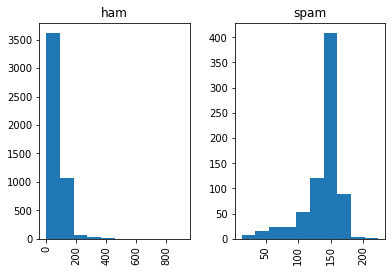

In [34]:
messs.hist(column="length", by = "label")

### To run any algorithim on the text data we will need to generate some sort of numerical data to perfoem classificaiton task. We will need to generate a "Bag of words" -each word represented by a number. We wil convert the messages to vectors a sequence of numbers. We will remove very common wrods. the a etc...and remove punctuation with python string lib

In [35]:
import string

## eg

In [37]:
me = "Hello! how are you?"

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
np_punc = [c for c in me if c not in string.punctuation]

### We will import english stop words. Common words that will not help us distinguish one word form the other

In [43]:
from nltk.corpus import stopwords

In [46]:
np_punc = ''.join(np_punc)

In [48]:
np_punc.split()

['Hello', 'how', 'are', 'you']

In [49]:
clean_message = [word for word in np_punc.split() if word.lower() not in stopwords.words("english")]

In [50]:
clean_message

['Hello']

### LEts put these concepts into a function to tokenize the text to convert the text to the words we want

In [66]:
def text_process(messa):
    ## remove punctuation
    ## remove stop words
    ## return cleaned text
    no_punc = [w for w in messa if w not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words("english")]
    

In [67]:
messs

,label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


### Each message is represented be a token(word we want) we will need to vectorize these words for out ML angorithims. 

In [68]:
messs['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
bagof_words = CountVectorizer(analyzer=text_process).fit(messs["Message"])

In [73]:
print(len(bagof_words.vocabulary_))

11425


In [74]:
mess4 = messs["Message"][4]
mess4

"Nah I don't think he goes to usf, he lives around here though"

In [78]:
mess4 = messs["Message"][4]

In [79]:
mess4

"Nah I don't think he goes to usf, he lives around here though"

In [80]:
words4 = bagof_words.transform([messs["Message"][4]])

In [82]:
print(words4)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [83]:
print(words4.shape)

(1, 11425)


In [84]:
messages_BOW = bagof_words.transform(messs["Message"])

In [86]:
print(messages_BOW.shape)

(5572, 11425)


In [87]:
type(messages_BOW)

scipy.sparse.csr.csr_matrix

In [88]:
messages_BOW.nnz

50548